Please don’t worry about spending hours making it very tidy and well commented as long as the input data is one of the following:

- The original data files Leanne provided us with
- The csv I created with co-ordinates of each station
- Any publicly available data (but just note the link rather than attaching the csv)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps

In [6]:
#Input data
df_leavers = pd.read_csv('LAS_Leavers_070319.csv') #original leavers data from LAS
postcode = pd.read_csv('org_L8_postcodes.csv') #postcode data
latlong = pd.read_csv('station_pc_latlong.csv') #station coord data from Liam on L7 level
staff_in_tfl = pd.read_csv('staffFinal_v4.csv') #current staff data with their travel duration from Rachel
df_leavers_1 = pd.read_csv("LEAVERS_WITH_STATION3.csv") #leavers data with coord data from Liam on L8 level, but duplicated records

In [29]:
##A. Correlation with travel duration

#Merge postcode and L8 data
df_leavers_1_SEC = df_leavers_1[(df_leavers_1['Org L5'] == '308 SEC Sector Operations L5')]
df_leavers_1_SEC = df_leavers_1_SEC.drop_duplicates()
SEC_postcodes = df_leavers_1_SEC[['Org L8','WorkLocation','PostcodeWork']].drop_duplicates()

In [35]:
SEC_postcodes.columns = ['Org L8', 'WorkLocation','Postcode']
SEC_postcodes = pd.merge(SEC_postcodes, latlong, on='Postcode').drop_duplicates()
SEC_postcodes = SEC_postcodes[['Org L8', 'Latitude', 'Longitude']]
SEC_postcodes = SEC_postcodes.groupby('Org L8').mean() #Take the centroid of different stations within the same L8 Department
SEC_postcodes.head()

,Latitude,Longitude
Org L8,,
308 SEC Barnehurst Ambulance Station,51.477557,0.107732
308 SEC Barnet Ambulance Station,51.583149,-0.121994
308 SEC Battersea Ambulance Station,51.460613,-0.167788
308 SEC Beckenham Ambulance Station,51.408006,-0.034010
308 SEC Becontree Ambulance Station,51.552588,0.160061


In [38]:
#Put the centroid LatLong to the original leavers data
leavers_SEC_loc = pd.merge(df_leavers, SEC_postcodes, on='Org L8').drop_duplicates()
leavers_SEC_loc.head()

,Employee Number,Assignment Number,Org L5,Org L6,Org L7,Org L8,Staff Group,Position Title,Job Role,Employee Latest Start Date,...,LOS (Years),LOS band,Age Band,Ethnic Origin,Bme group,Gender,Nationality,Assignment Category,Latitude,Longitude
0,24724142,24724142,308 SEC Sector Operations L5,308 SEC South East Sector L6,308 SEC Bromley Group Station L7,308 SEC Bromley Ambulance Station,Additional Clinical Services,Trainee Emergency Ambulance Crew 1,Technician,01/09/2014,...,0.0,< 1 year,41-45,A White - British,White,Female,British,Permanent,51.41006,0.012835
1,24724061,24724061,308 SEC Sector Operations L5,308 SEC South East Sector L6,308 SEC Bromley Group Station L7,308 SEC Bromley Ambulance Station,Additional Clinical Services,Trainee Emergency Ambulance Crew 1,Technician,01/09/2014,...,0.4,< 1 year,26-30,B White - Irish,White,Female,Irish,Permanent,51.41006,0.012835
2,24724287,24724287,308 SEC Sector Operations L5,308 SEC South East Sector L6,308 SEC Bromley Group Station L7,308 SEC Bromley Ambulance Station,Additional Clinical Services,Trainee Emergency Ambulance Crew 1,Technician,01/09/2014,...,0.4,< 1 year,21-25,J Asian or Asian British - Pakistani,BME,Male,Pakistani,Permanent,51.41006,0.012835
3,25596131,25596131,308 SEC Sector Operations L5,308 SEC South East Sector L6,308 SEC Bromley Group Station L7,308 SEC Bromley Ambulance Station,Additional Clinical Services,Trainee Emergency Ambulance Crew 2,Technician,30/11/2015,...,1.1,1-2 years,26-30,B White - Irish,White,Female,Irish,Permanent,51.41006,0.012835
4,23509440,23509440,308 SEC Sector Operations L5,308 SEC South East Sector L6,308 SEC Bromley Group Station L7,308 SEC Bromley Ambulance Station,Allied Health Professionals,Paramedic,Paramedic,05/11/2012,...,1.1,1-2 years,26-30,A White - British,White,Female,British,Permanent,51.41006,0.012835


In [40]:
#Get the mean travel duration of current staff per each L8 department from Rachel's data
staff_in_tfl = staff_in_tfl.dropna()
staff_in_tfl_SEC = staff_in_tfl[(staff_in_tfl['Directorate'] == '308 SEC Sector Operations L5')]
mean = staff_in_tfl_SEC.groupby(['Department'],as_index=False).agg({"travelDuration": "mean"})
mean.columns = ('Org L8','meanTravelDuration')

In [46]:
#Get the turnover rate per each L8 department in 2018
#Turnover rate = number of leavers in 2018/ number of current staff from current staff data

#Get the date format for each records
leavers_SEC_loc['Start Data'] = pd.to_datetime(leavers_SEC_loc['Employee Latest Start Date'])
leavers_SEC_loc['Start Month'] = leavers_SEC_loc['Start Data'].map(lambda x: x.month)
leavers_SEC_loc['Start Year'] = leavers_SEC_loc['Start Data'].map(lambda x: x.year)

leavers_SEC_loc['Termination Date'] = pd.to_datetime(leavers_SEC_loc['Termination Date'])
leavers_SEC_loc['Termination Month'] = leavers_SEC_loc['Termination Date'].map(lambda x: x.month)
leavers_SEC_loc['Termination Year'] = leavers_SEC_loc['Termination Date'].map(lambda x: x.year)

leavers_SEC_loc['Notified Date'] = pd.to_datetime(leavers_SEC_loc['Notified Date'])
leavers_SEC_loc['Notified Month'] = leavers_SEC_loc['Notified Date'].map(lambda x: x.month)
leavers_SEC_loc['Notified Year'] = leavers_SEC_loc['Notified Date'].map(lambda x: x.year)

In [47]:
#Get number of leavers in 2018
leavers_SEC_count_2018 = leavers_SEC_loc[leavers_SEC_loc['Termination Year'] == 2018]
leavers_SEC_count_2018 = leavers_SEC_count_2018[['Org L8', 'Longitude', 'Latitude']]
leavers_SEC_count_2018['leavers_count'] = (leavers_SEC_count_2018.groupby(['Longitude', 'Latitude'])['Org L8'].transform('count'))
leavers_SEC_count_2018 = leavers_SEC_count_2018.drop_duplicates()

leavers_SEC_count_2018.head()

In [54]:
#Get number of current staff
staff_in_sec = staff_in_tfl_SEC.groupby(['Department'],as_index=False).agg({"IDnumber": "count"})
staff_in_sec.columns = ('Org L8','InStaff')

In [59]:
#Get turnover rate
turnover = pd.merge(leavers_SEC_count_2018, staff_in_sec, on = 'Org L8')
turnover['rates'] = turnover['leavers_count']/turnover['InStaff']
turnover.head()

In [64]:
#Merge table of turnover rate with mean travel duration
turnover = pd.merge(turnover, mean, on = 'Org L8')

In [65]:
turnover.head()

,Org L8,Longitude,Latitude,leavers_count,InStaff,rates,meanTravelDuration
0,308 SEC Bromley Ambulance Station,0.012835,51.410060,7,107,0.065421,78.878505
1,308 SEC New Malden Ambulance Station,-0.188763,51.451129,13,51,0.254902,69.529412
2,308 SEC Hanwell Ambulance Station,-0.335506,51.505729,13,78,0.166667,64.423077
3,308 SEC Isleworth Ambulance Station,-0.339776,51.460783,4,39,0.102564,81.538462
4,308 SEC Homerton Ambulance Station,0.054362,51.546759,19,114,0.166667,59.491228


Text(0.5,1,'Turnover Rates of SEC department\n & Mean Travel Duration')

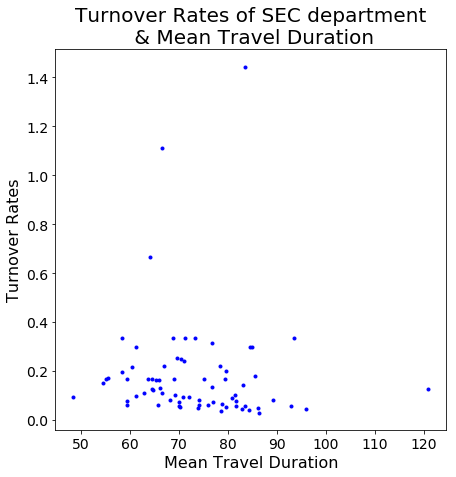

In [66]:
#Creating scatter plot of turnover rate and mean travel duration
x = turnover['meanTravelDuration']
y = turnover['rates']

# This line creates the figure. 
plt.figure(figsize=(7,7))
plt.xlabel("Mean Travel Duration", fontsize="16")
plt.ylabel("Turnover Rates", fontsize="16")
plt.plot(x,y,'b.')
plt.tick_params(labelsize = "14")
plt.title("Turnover Rates of SEC department\n & Mean Travel Duration", fontsize="20")

In [67]:
#Get correlation value of turnover rates and mean travel duration
turnover['meanTravelDuration'].corr(turnover['rates'])

-0.04591556951212472

In [68]:
##B. Correlation with workload

#Load incidents data
incident1 = pd.read_csv('Incidents/incidentsQ1.csv')
incident2 = pd.read_csv('Incidents/incidentsQ2.csv')
incident3 = pd.read_csv('Incidents/incidentsQ3.csv')
incident4 = pd.read_csv('Incidents/incidentsQ4.csv')

incident1 = pd.concat([incident1, incident2, incident3, incident4], ignore_index=True)
incident1 = incident1[['callstart','borough','ccgname','ccgcluster','lsoa','wardname','wardID']]
incident1['time'] = pd.to_datetime(incident1['callstart'])
incident1['time_Month'] = incident1['time'].map(lambda x: x.month)
incident1['time_Year'] = incident1['time'].map(lambda x: x.year)

incident1 = incident1[(incident1['time_Year'] == 2018)] #only take incident data in 2018

incident1.head()

,callstart,borough,ccgname,ccgcluster,lsoa,wardname,wardID,time,time_Month,time_Year
6418,2018-01-01 00:00:04.000,Lambeth,NHS Lambeth CCG,South East,E01003118,St Leonard`s,00AYGM,2018-01-01 00:00:04,1,2018
6419,2018-01-01 00:00:25.000,Waltham Forest,NHS Waltham Forest CCG,North East,E01004410,Hoe Street,00BHGJ,2018-01-01 00:00:25,1,2018
6420,2018-01-01 00:00:25.000,Haringey,NHS Haringey CCG,North Central,E01002019,Muswell Hill,00APGJ,2018-01-01 00:00:25,1,2018
6421,2018-01-01 00:01:29.000,Barnet,NHS Barnet CCG,North Central,E01000274,Oakleigh,00ACGN,2018-01-01 00:01:29,1,2018
6422,2018-01-01 00:01:36.000,Redbridge,NHS Redbridge CCG,North East,E01003751,Newbury,00BCGP,2018-01-01 00:01:36,1,2018


In [69]:
#Get the average number of incidents per borough per month
incident_borough = incident1.groupby(['borough','time_Month'],as_index=False).agg({"callstart": "count"})
incident_borough = incident_borough.groupby(['borough'],as_index=False).agg({"callstart": "mean"})

incident_borough.head()

,borough,callstart
0,Barking and Dagenham,2429.000000
1,Barnet,3654.166667
2,Bexley,2599.000000
3,Brent,3610.250000
4,Bromley,3267.500000


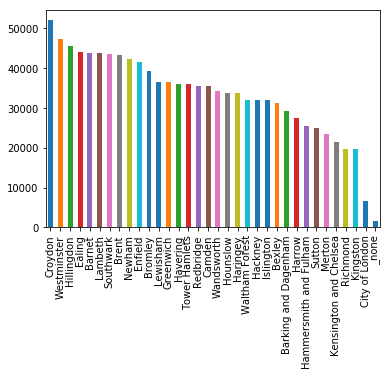

In [71]:
incident1['borough'].value_counts().plot(kind='bar')

In [72]:
incident_borough.to_csv('incidents2018_borough_mean.csv') #export to scv to visualize in tableau